In [1]:
import numpy as np
np.random.seed(0)
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from math import inf

from nnreg.analysis_fun import *
from matplotlib.patches import Rectangle
from nnreg.config import Config
from PROJECT_SETUP import ROJECT_ROOT_DIR
from RegLib.load_save_data import load_data_as_dict, load_best_checkpoint
from RegLib.HelperFunctions import plot_values_with_two_y_axis, plot_values_with_info, save_figure

In [2]:
path_for_sdg = Path('Results', 'SDG')

def get_all_results_for_p(path:Path, p:int):

    all_dir = [x for x in path.iterdir() if x.is_dir()]
    results = []

    for i in range(len(all_dir)-1):
        d = all_dir[i]
        cfg = Config(config_file = Path(d).joinpath("sgd.yaml"))
        if cfg.DATA.FRANKIE.P == p:
            #print(f"P: {cfg.DATA.FRANKIE.P}, LR: {cfg.OPTIM.LR}, batch_size: {cfg.OPTIM.BATCH_SIZE}")
            best = load_best_checkpoint(d)
            #print(f'{best["Step"]}, {best["Test_eval"]}, {best["Proccess_time"]}"')

            results.append({"LR": cfg.OPTIM.LR, "batch_size": cfg.OPTIM.BATCH_SIZE, "Eval": best["Test_eval"],                              "Time": best["Proccess_time"], "Step": best["Step"], "Name": d})
    return results

results = get_all_results_for_p(path_for_sdg, 2)
print("Total results for p 2: ", len(results))
results_five = get_all_results_for_p(path_for_sdg, 5)
print("Total results for p 5: ", len(results_five))
print(results_five)

Total results for p 2:  12
Total results for p 5:  7
[{'LR': 0.0001, 'batch_size': 20, 'Eval': 0.01684726485496595, 'Time': [20.0, 2.1689248085021973], 'Step': 298690, 'Name': WindowsPath('Results/SDG/00001205')}, {'LR': 0.0001, 'batch_size': 60, 'Eval': 0.016866368753546, 'Time': [3.0, 53.79733443260193], 'Step': 99550, 'Name': WindowsPath('Results/SDG/00001605')}, {'LR': 0.001, 'batch_size': 20, 'Eval': 0.013958208746902984, 'Time': [11.0, 32.97233247756958], 'Step': 296110, 'Name': WindowsPath('Results/SDG/0001205')}, {'LR': 0.001, 'batch_size': 60, 'Eval': 0.013949735980702772, 'Time': [1.0, 54.10863494873047], 'Step': 99490, 'Name': WindowsPath('Results/SDG/0001605')}, {'LR': 0.01, 'batch_size': 20, 'Eval': 97.24908471251024, 'Time': [0.0, 0.24634003639221191], 'Step': 0, 'Name': WindowsPath('Results/SDG/001205')}, {'LR': 0.01, 'batch_size': 60, 'Eval': 887.7489332533144, 'Time': [0.0, 0.1595754623413086], 'Step': 0, 'Name': WindowsPath('Results/SDG/001605')}, {'LR': 1e-05, 'batch

In [12]:
def analyse_results(results):
    s_results = unpack(results, replace_val_bigger = inf)
    min_val = get_min_value(results, "Eval")
    print("Best val: ", min_val)
    best_checkpoint = load_best_checkpoint(min_val["Name"])
    position_index = s_results.index.get_loc(min_val["batch_size"])
    position_column = s_results.columns.get_loc(min_val["LR"])
    plot_lr_tran_val(best_checkpoint, ylimit = (0.0, 1.5), info_to_add = {}, save_fig = False)
    show_heatmap(s_results, patch_placement= (position_column, position_index), title = "SGD MSE on Franke", xlabel = 'Learning rate', ylabel = 'Batch size', show_bar = True, save_fig = False)

Max value:  887.7489332533144
Best val:  {'LR': 0.001, 'batch_size': 60, 'Eval': 0.013949735980702772, 'Time': [1.0, 54.10863494873047], 'Step': 99490, 'Name': WindowsPath('Results/SDG/0001605')}


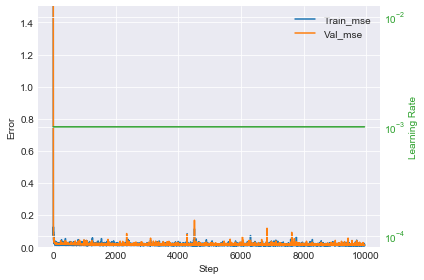

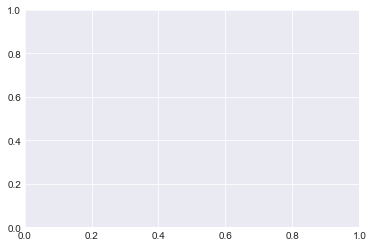

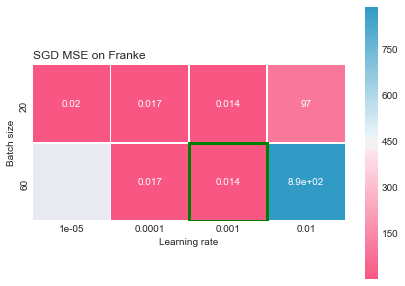

In [13]:
analyse_results(results_five)

Max value:  0.026154296002023972
Best val:  {'LR': 0.01, 'batch_size': 20, 'Eval': 0.026154296002023972, 'Time': [0.0, 45.01198410987854], 'Step': 84820, 'Name': WindowsPath('Results/SDG/001202')}


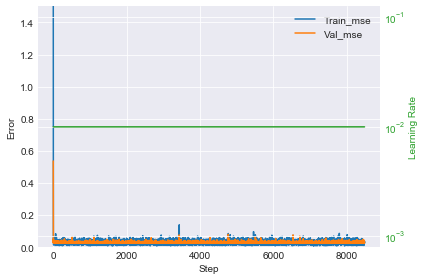

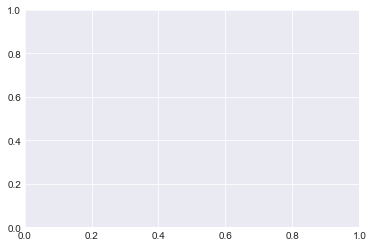

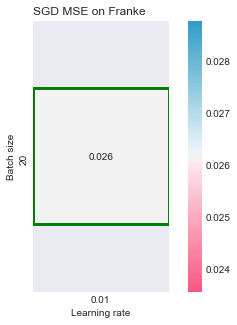

In [18]:
analyse_results([results[6]])

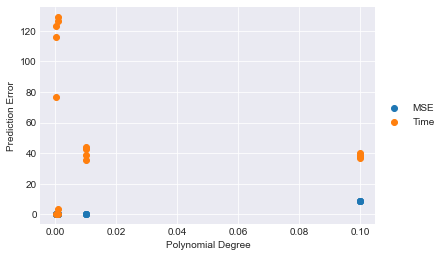

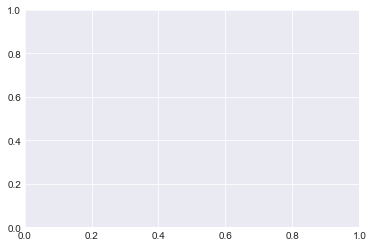

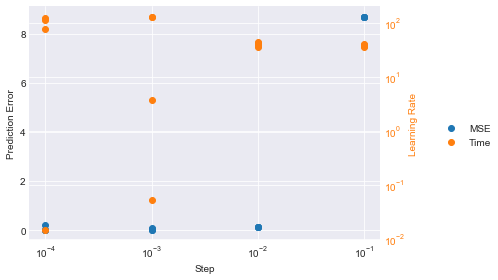

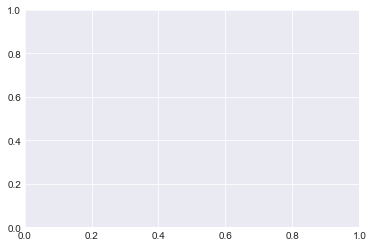

In [5]:
values_to_plot_y1 = {"MSE": data_dict["results"]}
values_to_plot_y2 = {"Time": data_dict["times"]}
values_to_plot = {"MSE": data_dict["results"], "Time": data_dict["times"]}
plot_values_with_info(lr, values_to_plot, scatter = True)
plot_values_with_two_y_axis(lr, values_to_plot_y1, values_to_plot_y2, xscale = "log", scatter = True)

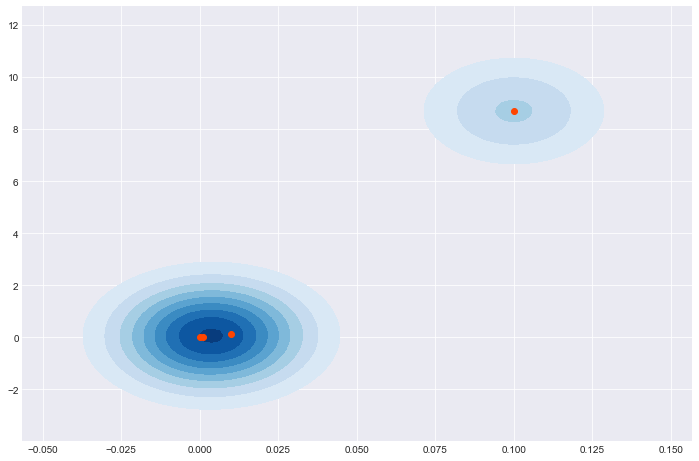

In [38]:
fig, ax = plt.subplots(1, figsize=(12,8))
n = 12
x_axis = lr[n:]
y_axis = data_dict["results"][n:]
sb.kdeplot(x_axis, y_axis, cmap='Blues',
           shade=True, shade_lowest=False)
plt.scatter(x_axis, y_axis, color='orangered')
plt.show()

In [1]:
from nnreg.SGD import SGD as SGD
from RegLib.HelperFunctions import create_frankie_data, create_X, plot_values_with_info
from nnreg.config import Config
from PROJECT_SETUP import ROJECT_ROOT_DIR
from RegLib.load_save_data import load_best_checkpoint

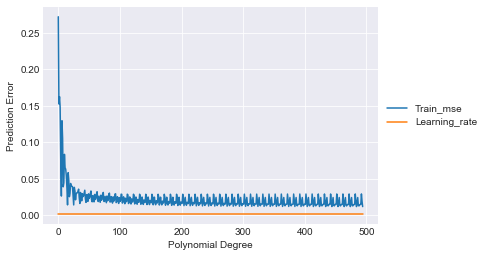

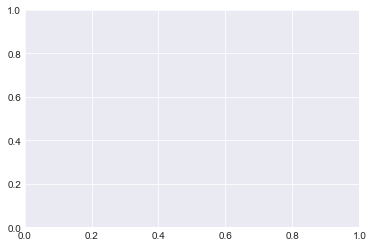

In [24]:
cfg = Config()

output_dir = ROJECT_ROOT_DIR.joinpath(cfg.OUTPUT_DIR)
best_data_dict = load_best_checkpoint(output_dir)
# print(len(list(best_data_dict["Train_mse"].values())))
# print(len(list(best_data_dict["Train_r2"].values())))
# print(len(list(best_data_dict["Learning_rate"].values())))
# print(len([x for x in range(best_data_dict["Step"] + 1)]))
values_to_plot = {
    "Train_mse": list(best_data_dict["Train_mse"].values()),
    #"Train_r2": list(best_data_dict["Train_r2"].values()),
    "Learning_rate": list(best_data_dict["Learning_rate"].values()),
}
plot_values_with_info([x for x in range(best_data_dict["Step"] + 1)], values_to_plot)